**Task #6 Prediction using Decision Tree Algorithm**

**DINESH KUMAR P**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
data_iris = pd.read_csv("E:\datasets\Iris.csv")
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# To check the number of non-null values in the dataset
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#Dropping the Id of the dataset
data_iris.drop(["Id"], axis=1, inplace=True)
print("Unique Species :",data_iris.Species.unique())

Unique Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


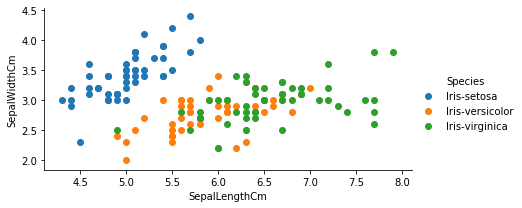

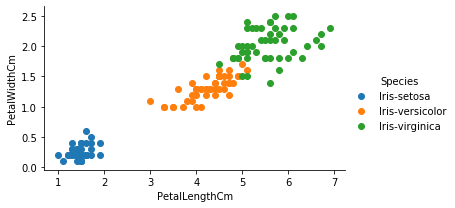

In [6]:
#Data visualization based on the width and length of the sepal and petal
fg = sns.FacetGrid(data=data_iris, hue='Species', aspect=2)
fg.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

fg = sns.FacetGrid(data=data_iris, hue='Species', aspect=1.7)
fg.map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

X = data_iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = data_iris["Species"]

#Splitting train and test dataset with an ratio of 80 to 20 respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Since the data is very limited we use cross validation to check the performance of the model, 
# for which we split the train dataset again on a ratio 80 to 20

X_trn, X_tst, y_trn, y_tst = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Building and Training the decision tree classifier model
dtc = DecisionTreeClassifier()
dtc.fit(X_trn, y_trn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(125.55000000000001, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.666\nsamples = 96\nvalue = [32, 30, 34]'),
 Text(83.7, 170.84571428571428, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(167.4, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(83.7, 139.78285714285715, 'X[3] <= 1.6\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(41.85, 108.72, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(125.55000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 139.78285714285715, 'X[2] <= 5.05\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(209.25, 108.72, 'X[1] <= 2.9\ngini = 0.444\nsamples = 9\nvalue = [0, 3, 6]'),
 Text(167.4, 77.65714285714284, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(251.10000000000002, 77.65714285714284, 'X[2] <= 4.85\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(209.25, 46.59428571428572, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue =

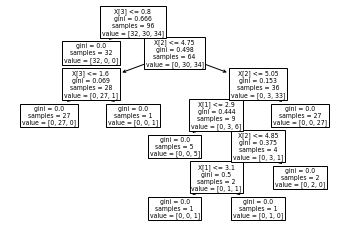

In [9]:
#visualizing the decision tree 
tree.plot_tree(dtc)

In [10]:
#validating the Decision tree using cross-validation method
accuracy = cross_val_score(dtc, X_trn, y_trn, scoring='accuracy', cv = 3)
print(accuracy)

print("Accuracy of Model with Cross Validation:",accuracy.mean() * 100,'%')

[0.93939394 0.90625    0.96774194]
Accuracy of Model with Cross Validation: 93.77952916259368 %


In [11]:
#testing the model using validation data
y_pred = dtc.predict(X_tst)

#Evaluating the performance of the model based on accuracy and confusion matrix
print("Accuracy:",round(metrics.accuracy_score(y_tst, y_pred)*100,2),"%")
print("Confusion matrix:\n",metrics.multilabel_confusion_matrix(y_tst,y_pred))

Accuracy: 91.67 %
Confusion matrix:
 [[[16  0]
  [ 0  8]]

 [[13  0]
  [ 2  9]]

 [[17  2]
  [ 0  5]]]


In [12]:
#Testing the model with unseen data
y_pred = dtc.predict(X_test)

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")
print("Confusion matrix:\n",metrics.multilabel_confusion_matrix(y_test,y_pred))

Accuracy: 93.33 %
Confusion matrix:
 [[[20  0]
  [ 0 10]]

 [[20  1]
  [ 1  8]]

 [[18  1]
  [ 1 10]]]


In [13]:
#Building and training the model on actual train data
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(103.01538461538462, 201.90857142857143, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Te

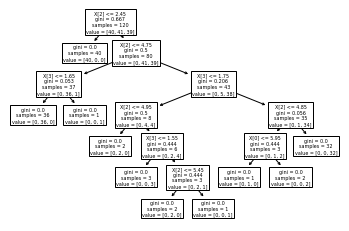

In [14]:
tree.plot_tree(dc)

In [15]:
#Testing the model on actual test data
y_prd = dc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_prd)*100,'%')
print("Confusion matrix:\n",metrics.multilabel_confusion_matrix(y_test,y_prd))

Accuracy: 100.0 %
Confusion matrix:
 [[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]


In [19]:
#Random Test points have been used to check whether it predicts the right class of species
test_points = [[5.2,3.1,4.6,1.6],
               [5.0,3.2,1.6,0.4],
               [6.0,2.0,5.0,1.4]]

print("predictions:",dc.predict(test_points))

predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']
